## Sentiment Analysis by Gender
Sentiment Analysis is the computational treatment of opinion, sentiment, and subjectivity in text. 'Sentiment' can be defined as values, opinions, emotions, and attitudes. The emotional weight of a text as a whole is gathered, with the assumption that it is tied to the sentiment of the person writing the text. For this sentiment analysis of the philosophical texts, the NRC Word-Emotion lexicon is used. The NRC lexicon is a lost of English words and their association with eight basic emotions: anger, fear, anticipation, trust, surprise, sadness, joy, and disgust. The two sentiments are explored, negative and positive, which are used to analyze polarity. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML #to print out html of text
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline 

In [2]:
#set configuration/OHCO params
OHCO = ['author', 'title', 'para_num', 'sent_num'] # We exclude genre
TITLE = OHCO[1:2]
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

#import csv files - Token and sentiment analysis lexicon
TOKENS = pd.read_csv("TOKEN_expanded.csv").set_index(OHCO).sort_index()
salex = pd.read_csv("salex_nrc.csv").set_index('term_str')

In [3]:
TOKENS.head()

text_id  token_num  \
author    title             para_num sent_num                       
Aristotle NicomachaenEthics 16       0               1          0   
                                     0               1          1   
                                     0               1          2   
                                     0               1          3   
                                     0               1          4   

                                                        pos_tuple pos  \
author    title             para_num sent_num                           
Aristotle NicomachaenEthics 16       0            ('Every', 'DT')  DT   
                                     0              ('art', 'NN')  NN   
                                     0              ('and', 'CC')  CC   
                                     0            ('every', 'DT')  DT   
                                     0         ('inquiry,', 'NN')  NN   

                                              token_str term_str  term_id  \
author    title             para_num sent_num                               
Aristotle NicomachaenEthics 16       0            Every    every    15890   
                                     0              art      art     2942   
                                     0              and      and     1976   
                                     0            every    every    15890   
                                     0         inquiry,  inquiry    23364   

                                                                                        file  \
author    title             para_num sent_num                                                  
Aristotle NicomachaenEthics 16       0         philostexts\Aristotle_NicomachaenEthics-1.txt   
                                     0         philostexts\Aristotle_NicomachaenEthics-1.txt   
                                     0         philostexts\Aristotle_NicomachaenEthics-1.txt   
                                     0         philostexts\Aristotle_NicomachaenEthics-1.txt   
                                     0         philostexts\Aristotle_NicomachaenEthics-1.txt   

                                              gender      era  
author    title             para_num sent_num                  
Aristotle NicomachaenEthics 16       0             M  ancient  
                                     0             M  ancient  
                                     0             M  ancient  
                                     0             M  ancient  
                                     0             M  ancient

In [4]:
salex.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust
term_str,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abduction,0,0,0,1,0,1,0,1,1,0
aberration,0,0,1,0,0,1,0,0,0,0


In [5]:
#create table of female authors
female = TOKENS[TOKENS.gender == 'F']
#female.head()
#create table of male authors
male = TOKENS[TOKENS.gender == 'M']
#male.head()
#create table for ancient texts
ancient = TOKENS[TOKENS.era == 'ancient']
#create table for Classical texts
classical = TOKENS[TOKENS.era == 'classical']
#create table for modern texts
modern = TOKENS[TOKENS.era == 'modern']

In [6]:
salex.columns = [col.replace('nrc_','') for col in salex.columns]
salex['polarity'] = salex.positive - salex.negative #create polarity term #negatice = -1, positive = 1

#Get lexicon columns
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()
emo_cols

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

In [7]:
#join salex lexicon to TOKENS table on 'term_str', left join = TOKENS table preserved 
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)
TOKENS[salex.columns].sample(10)

#join salex lexicon to female table on 'term_str', left join = female table preserved 
female = female.join(salex, on='term_str', how='left')
female[emo_cols] = female[emo_cols].fillna(0)
female[salex.columns].sample(10)

#join salex lexicon to male table on 'term_str', left join = male table preserved 
male = male.join(salex, on='term_str', how='left')
male[emo_cols] = male[emo_cols].fillna(0)
male[salex.columns].sample(10)

#join salex lexicon to table on 'term_str', left join = table preserved 
ancient = ancient.join(salex, on='term_str', how='left')
ancient[emo_cols] = ancient[emo_cols].fillna(0)
ancient[salex.columns].sample(10)

#join salex lexicon to table on 'term_str', left join = table preserved 
classical = classical.join(salex, on='term_str', how='left')
classical[emo_cols] = classical[emo_cols].fillna(0)
classical[salex.columns].sample(10)

#join salex lexicon to table on 'term_str', left join = table preserved 
modern = modern.join(salex, on='term_str', how='left')
modern[emo_cols] = modern[emo_cols].fillna(0)
modern[salex.columns].sample(10)

anger  \
author           title                       para_num sent_num          
Simonedebeauvoir TheSecondSex                37659    0           0.0   
Kierkegaard      CollectionOfWritings        8229     0           0.0   
Hesse            Siddhartha                  261      0           0.0   
HannahArendt     TheOriginsofTotalitarianism 14525    0           0.0   
Simonedebeauvoir TheSecondSex                24072    0           0.0   
                                             35898    0           0.0   
                                             1053     0           0.0   
HannahArendt     TheOriginsofTotalitarianism 25009    0           0.0   
Kierkegaard      CollectionOfWritings        4215     1           0.0   
Simonedebeauvoir TheSecondSex                36475    0           0.0   

                                                                anticipation  \
author           title                       para_num sent_num                 
Simonedebeauvoir TheSecondSex                37659    0                  0.0   
Kierkegaard      CollectionOfWritings        8229     0                  0.0   
Hesse            Siddhartha                  261      0                  0.0   
HannahArendt     TheOriginsofTotalitarianism 14525    0                  0.0   
Simonedebeauvoir TheSecondSex                24072    0                  0.0   
                                             35898    0                  0.0   
                                             1053     0                  1.0   
HannahArendt     TheOriginsofTotalitarianism 25009    0                  0.0   
Kierkegaard      CollectionOfWritings        4215     1                  0.0   
Simonedebeauvoir TheSecondSex                36475    0                  0.0   

                                                                disgust  fear  \
author           title                       para_num sent_num                  
Simonedebeauvoir TheSecondSex                37659    0             0.0   0.0   
Kierkegaard      CollectionOfWritings        8229     0             0.0   0.0   
Hesse            Siddhartha                  261      0             0.0   0.0   
HannahArendt     TheOriginsofTotalitarianism 14525    0             0.0   0.0   
Simonedebeauvoir TheSecondSex                24072    0             0.0   0.0   
                                             35898    0             0.0   0.0   
                                             1053     0             0.0   0.0   
HannahArendt     TheOriginsofTotalitarianism 25009    0             0.0   0.0   
Kierkegaard      CollectionOfWritings        4215     1             0.0   0.0   
Simonedebeauvoir TheSecondSex                36475    0             0.0   0.0   

                                                                joy  negative  \
author           title                       para_num sent_num                  
Simonedebeauvoir TheSecondSex                37659    0         0.0       NaN   
Kierkegaard      CollectionOfWritings        8229     0         0.0       NaN   
Hesse            Siddhartha                  261      0         0.0       NaN   
HannahArendt     TheOriginsofTotalitarianism 14525    0         0.0       NaN   
Simonedebeauvoir TheSecondSex                24072    0         0.0       NaN   
                                             35898    0         0.0       NaN   
                                             1053     0         1.0       0.0   
HannahArendt     TheOriginsofTotalitarianism 25009    0         0.0       NaN   
Kierkegaard      CollectionOfWritings        4215     1         0.0       NaN   
Simonedebeauvoir TheSecondSex                36475    0         0.0       NaN   

                                                                positive  \
author           title                       para_num sent_num             
Simonedebeauvoir TheSecondSex                37659    0              NaN   
Kierkegaard      CollectionOfWritings        8229   

In [8]:
TOKENS[['term_str'] + emo_cols].sample(10) #words associated with emotion 
female[['term_str'] + emo_cols].sample(10) #words associated with emotion
male[['term_str'] + emo_cols].sample(10) #words associated with emotion 
ancient[['term_str'] + emo_cols].sample(10) #words associated with emotion 
classical[['term_str'] + emo_cols].sample(10) #words associated with emotion 
modern[['term_str'] + emo_cols].sample(10) #words associated with emotion 

term_str  \
author           title                       para_num sent_num              
Kierkegaard      CollectionOfWritings        1434     1           averred   
Foucault         TheOrderofThings            7968     0             three   
Simonedebeauvoir TheSecondSex                14554    0          feelings   
Foucault         TheOrderofThings            13125    0          language   
Simonedebeauvoir TheSecondSex                13537    0              azur   
Kierkegaard      CollectionOfWritings        5891     0          argument   
Foucault         TheOrderofThings            5838     0           grammar   
                                             8458     0         giltheads   
Simonedebeauvoir TheSecondSex                10109    0               she   
HannahArendt     TheOriginsofTotalitarianism 12889    0          appetite   

                                                                anger  \
author           title                       para_num sent_num          
Kierkegaard      CollectionOfWritings        1434     1           0.0   
Foucault         TheOrderofThings            7968     0           0.0   
Simonedebeauvoir TheSecondSex                14554    0           0.0   
Foucault         TheOrderofThings            13125    0           0.0   
Simonedebeauvoir TheSecondSex                13537    0           0.0   
Kierkegaard      CollectionOfWritings        5891     0           1.0   
Foucault         TheOrderofThings            5838     0           0.0   
                                             8458     0           0.0   
Simonedebeauvoir TheSecondSex                10109    0           0.0   
HannahArendt     TheOriginsofTotalitarianism 12889    0           0.0   

                                                                anticipation  \
author           title                       para_num sent_num                 
Kierkegaard      CollectionOfWritings        1434     1                  0.0   
Foucault         TheOrderofThings            7968     0                  0.0   
Simonedebeauvoir TheSecondSex                14554    0                  0.0   
Foucault         TheOrderofThings            13125    0                  0.0   
Simonedebeauvoir TheSecondSex                13537    0                  0.0   
Kierkegaard      CollectionOfWritings        5891     0                  0.0   
Foucault         TheOrderofThings            5838     0                  0.0   
                                             8458     0                  0.0   
Simonedebeauvoir TheSecondSex                10109    0                  0.0   
HannahArendt     TheOriginsofTotalitarianism 12889    0                  0.0   

                                                                disgust  fear  \
author           title                       para_num sent_num                  
Kierkegaard      CollectionOfWritings        1434     1             0.0   0.0   
Foucault         TheOrderofThings            7968     0             0.0   0.0   
Simonedebeauvoir TheSecondSex                14554    0             0.0   0.0   
Foucault         TheOrderofThings            13125    0             0.0   0.0   
Simonedebeauvoir TheSecondSex                13537    0             0.0   0.0   
Kierkegaard      CollectionOfWritings        5891     0             0.0   0.0   
Foucault         TheOrderofThings            5838     0             0.0   0.0   
                                             8458     0             0.0   0.0   
Simonedebeauvoir TheSecondSex                10109    0             0.0   0.0   
HannahArendt     TheOriginsofTotalitarianism 12889    0             0.0   0.0   

                                                                joy  sadness  \
author           title                       para_num sent_num                 
Kierkegaard      CollectionOfWritings        1434     1         0.0      0.0   
Foucault         TheOrderofThings            7968     0         0.0      0.0   
Simonedeb

In [9]:
#if NaN, treat as 0 (doesn't matter for pos/neg columns since we're looking at polarity)
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0) 
female[emo_cols] = female[emo_cols].fillna(0) 
male[emo_cols] = male[emo_cols].fillna(0) 
ancient[emo_cols] = ancient[emo_cols].fillna(0)
classical[emo_cols] = classical[emo_cols].fillna(0)
modern[emo_cols] = modern[emo_cols].fillna(0)

#### Overall emotion over all texts

<AxesSubplot:>

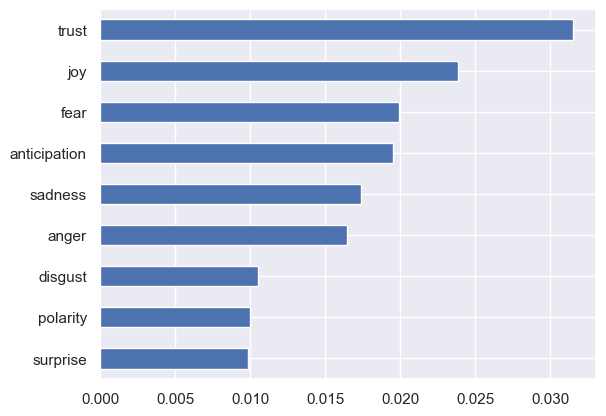

In [10]:
TOKENS[emo_cols].mean().sort_values().plot.barh()

#### Emotions in Texts by FEMALE Authors

<AxesSubplot:>

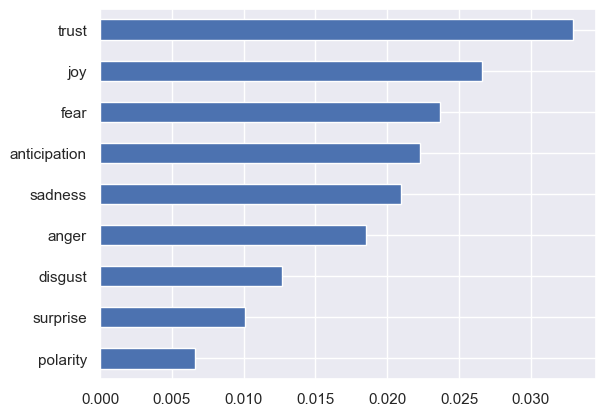

In [11]:
female[emo_cols].mean().sort_values().plot.barh()

#### Emotions in Texts by MALE Authors

<AxesSubplot:>

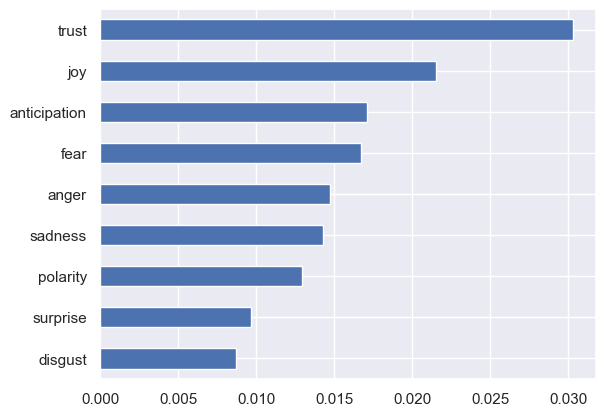

In [12]:
male[emo_cols].mean().sort_values().plot.barh()

#### Emotions in Ancient Texts

<AxesSubplot:>

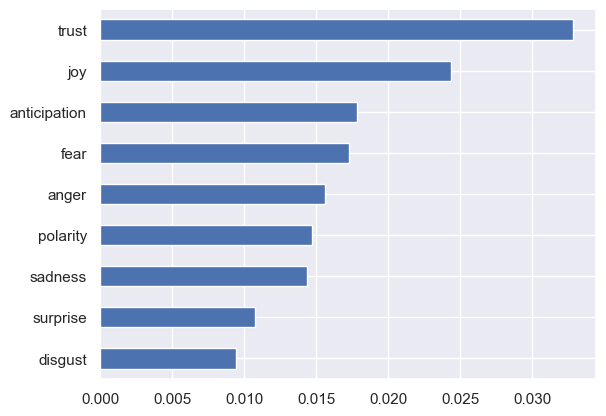

In [13]:
ancient[emo_cols].mean().sort_values().plot.barh()

#### Emotions in Classical Texts

<AxesSubplot:>

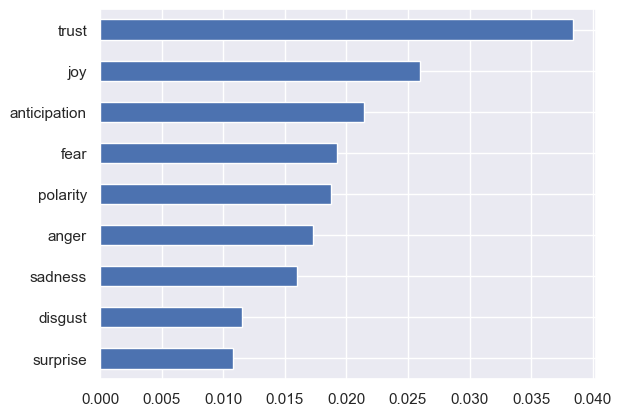

In [14]:
classical[emo_cols].mean().sort_values().plot.barh()

#### Emotions in Modern Texts

<AxesSubplot:>

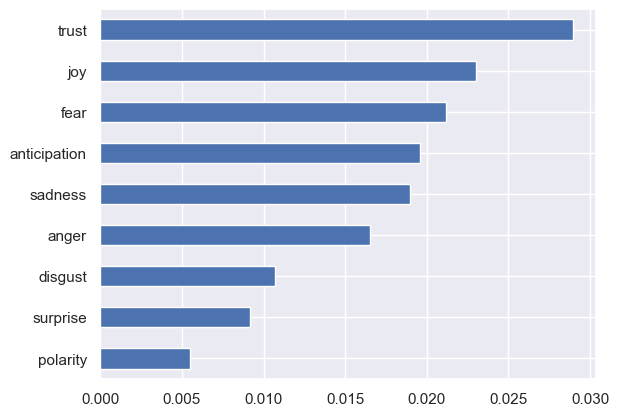

In [15]:
modern[emo_cols].mean().sort_values().plot.barh()

#### Analysis
....

#### Sentiment For All Texts

In [16]:
#function to plot line graph
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25,5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

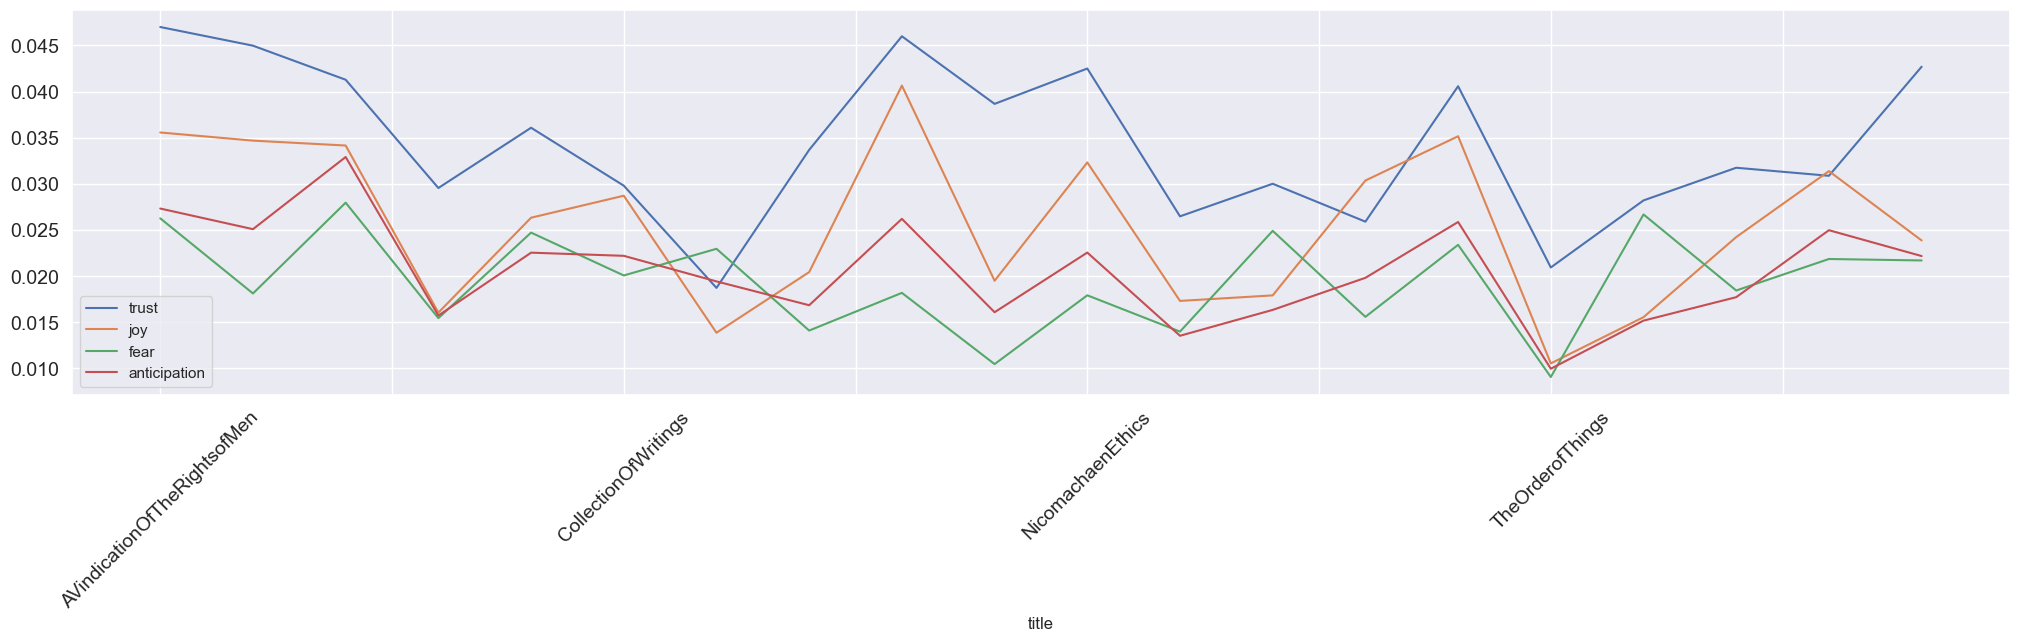

In [17]:
titles = TOKENS.groupby(TITLE)[emo_cols].mean()
#plot top 4 emotions by paragraoh for all texts
plot_sentiments(titles, ['trust', 'joy', 'fear', 'anticipation'])

#### Sentiment by Text for FEMALE Authors

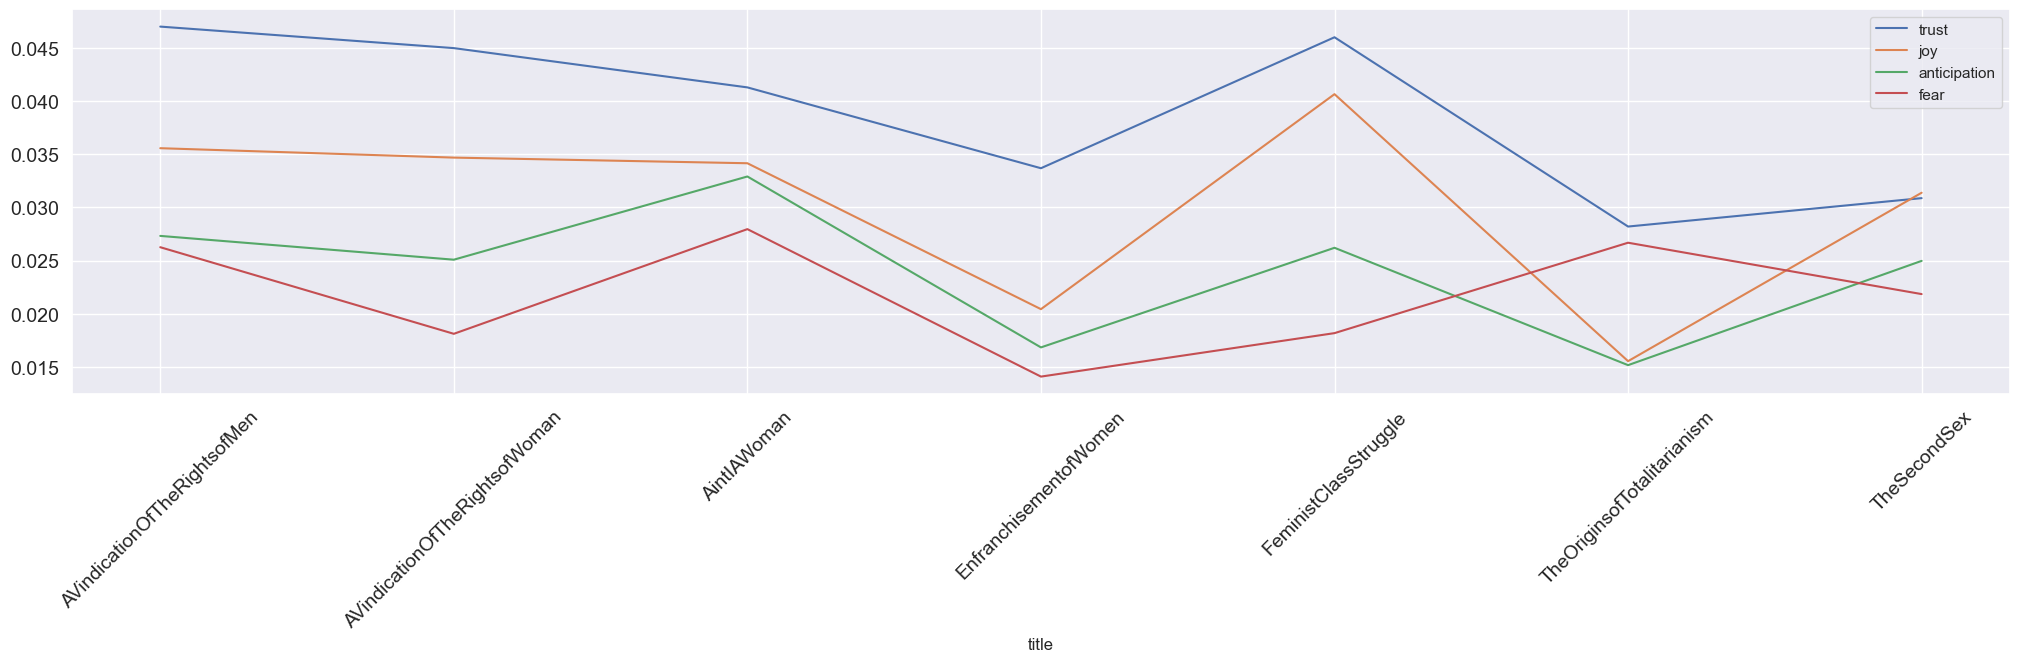

In [18]:
title_f = female.groupby(TITLE)[emo_cols].mean()
plot_sentiments(title_f, ['trust', 'joy', 'anticipation', 'fear'])

#### Sentiment by Text for MALE Authors

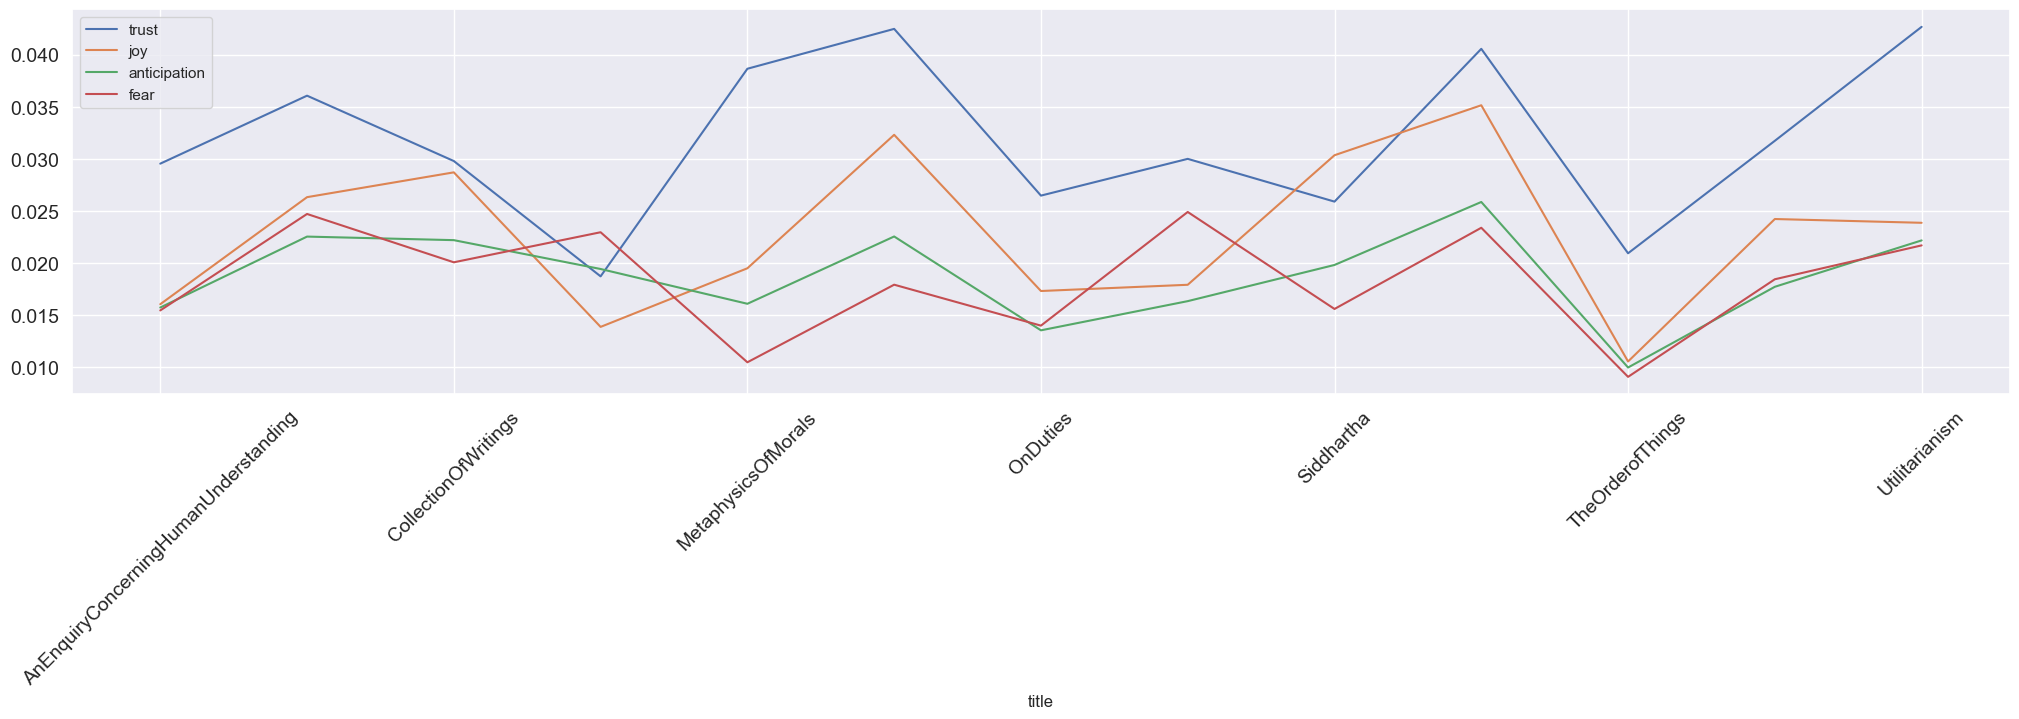

In [19]:
title_m = male.groupby(TITLE)[emo_cols].mean()
plot_sentiments(title_m, ['trust', 'joy', 'anticipation', 'fear'])

#### Sentiment for Ancient Texts

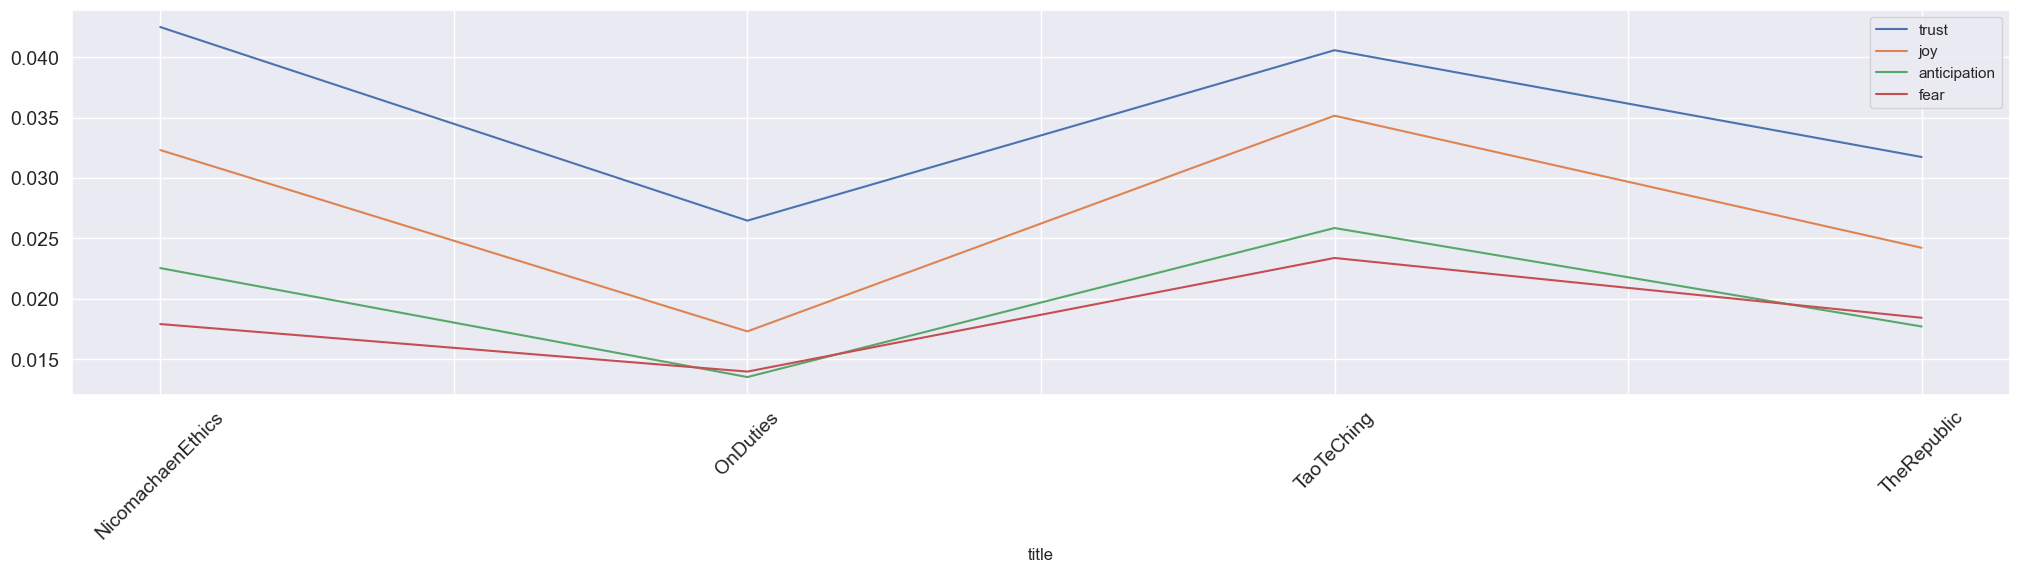

In [20]:
title_ancient = ancient.groupby(TITLE)[emo_cols].mean()
plot_sentiments(title_ancient, ['trust', 'joy', 'anticipation', 'fear'])

#### Sentiment for Classical Texts

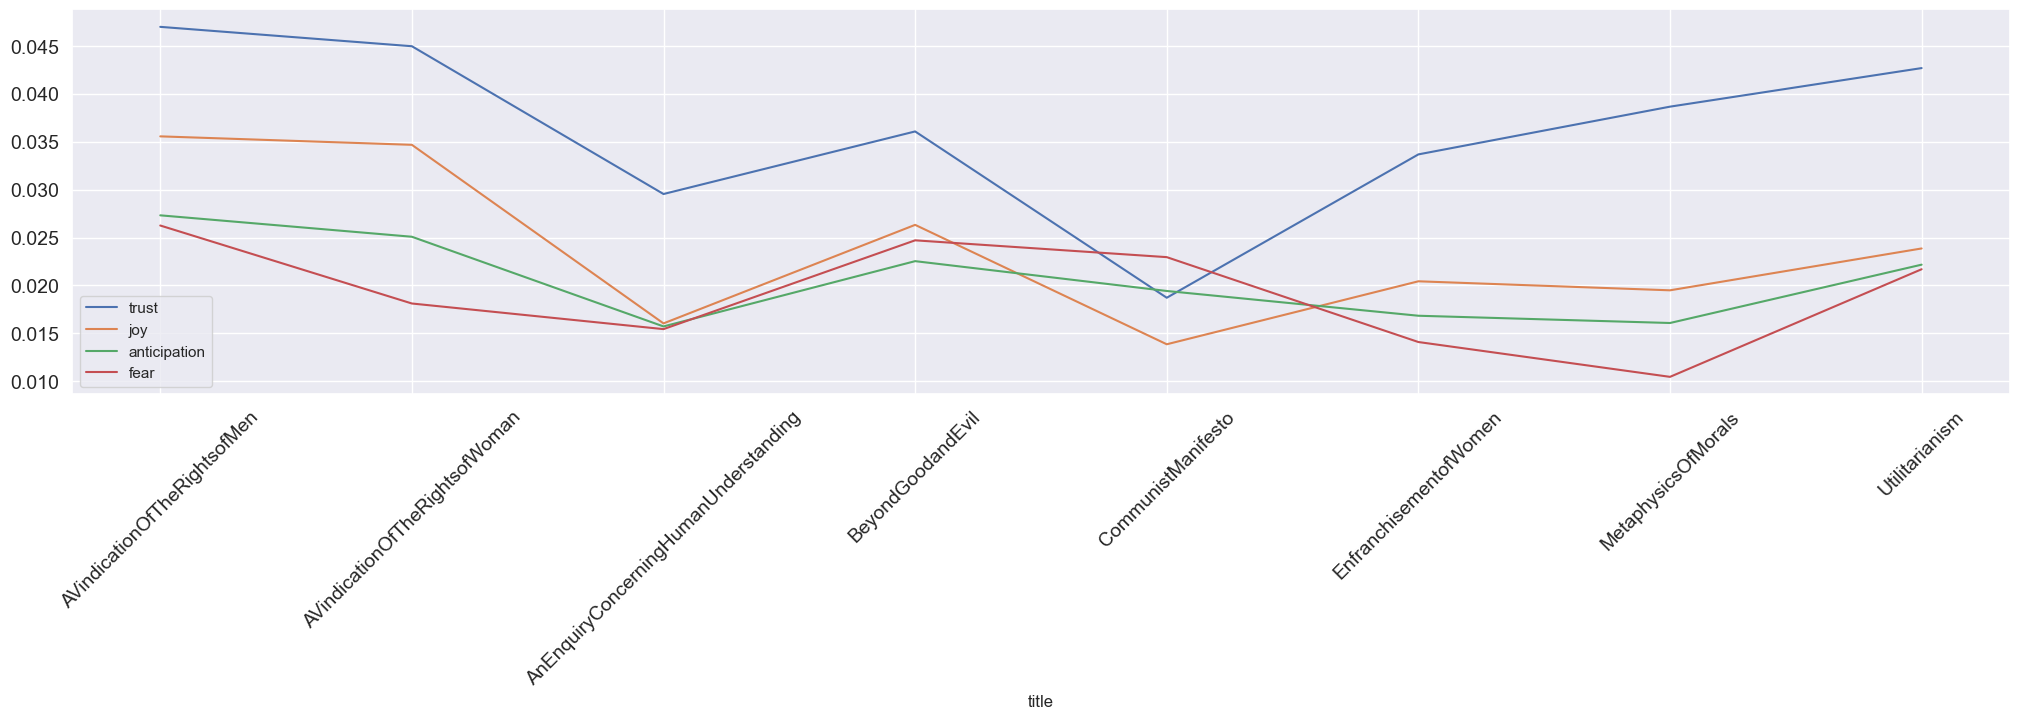

In [21]:
title_classical = classical.groupby(TITLE)[emo_cols].mean()
plot_sentiments(title_classical, ['trust', 'joy', 'anticipation', 'fear'])

#### Sentiment for Modern Texts

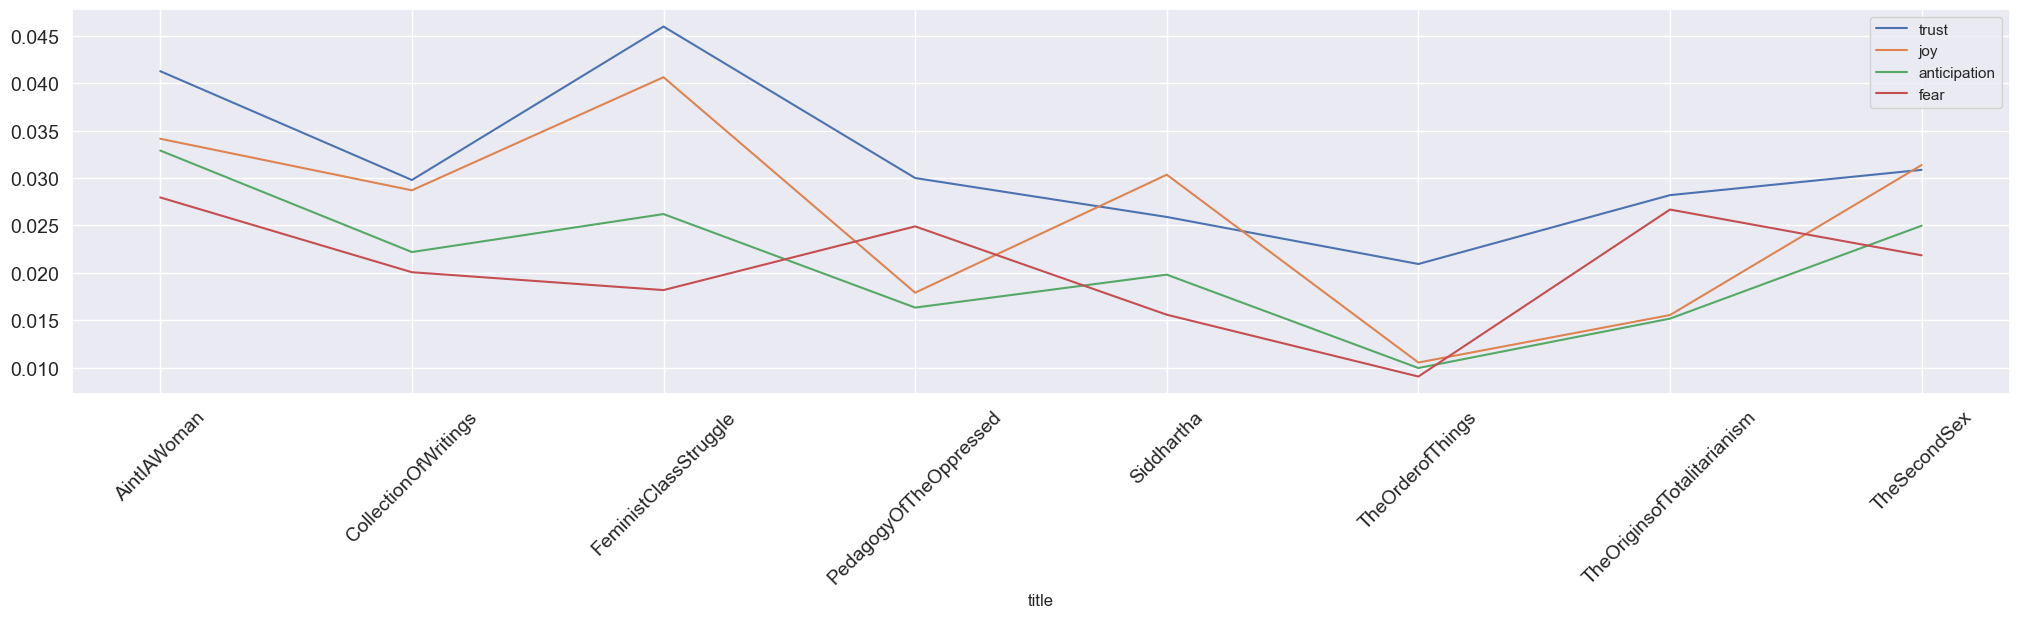

In [22]:
title_modern = modern.groupby(TITLE)[emo_cols].mean()
plot_sentiments(title_modern, ['trust', 'joy', 'anticipation', 'fear'])

#### Analysis
....